# Exercise set 3 - Logistic Regression and Evaluation Metrics

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

def plot_3d_data(x_data, y_data, z_data, title="", interactive=False):
    """
    A function to plot 3D data interactively or statically.
    
    Parameters:
    - x_data: Data for the x-axis
    - y_data: Data for the y-axis
    - z_data: Data for the z-axis (e.g., sigmoid outputs)
    - title: Title for the plot
    - interactive: If True, uses Plotly for interactive 3D plots. If False, uses Matplotlib for static plots.
    """
    if interactive:
        # Use Plotly for an interactive 3D plot
        fig = go.Figure(data=[go.Scatter3d(x=x_data, y=y_data, z=z_data, mode='markers', marker=dict(size=5))])
        fig.update_layout(title=title, scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
                          autosize=False, width=800, height=600, margin=dict(l=0, r=0, b=0, t=40))
        fig.show()
    else:
        # Use Matplotlib for a static 3D plot
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_data, y_data, z_data, color='blue', s=50, alpha=0.8)
        ax.set_title(title)
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        plt.show()

### Problem 1

Despite the term 'regression' being part of its name, logistic regression is considered a classification algorithm. This naming can often lead to confusion, particularly when contrasted with linear regression. In Chapter 10.7 of the textbook (*Alpaydin, 3rd ed.*), the mathematical formulation for logistic regression is presented as:

$
y = \frac{1}{1 + \exp{[-(w^T x + w_0)]}}
$

We can rewrite this expression using the sigmoid function, denoted by \( \sigma(\cdot) \), as follows:

$
y = \sigma(w^T x + w_0)
$


#### (1b)
Transform the Cartesian plane into a three-dimensional space by adding a z-axis, which represents the output of the sigmoid function, ranging from $(0, 1)$. Note that the linear decision boundary in the Cartesian plane corresponds to the midpoint of $0.5$ on the z-axis. The instances sampled from the $\mathcal{N}(\mu_1, \Sigma_1)$ distribution, which represents class 1, should yield a sigmoid output close to 0. Conversely, the instances from the $\mathcal{N}(\mu_2, \Sigma_2)$ distribution, representing class 2, should have a sigmoid output close to 1.

#### (1c)
Assume that the linear decision boundary in (1a) is ineffective, leading to an estimated accuracy of around 50%. Replicate the process in (1b) using this ineffective decision boundary.

#### (1d)
Elaborate on the appropriate choice of the loss function for this binary classification task by discussing the differences and implications seen in the visualizations from (1b) and (1c).

#### (1e)
The figure below depicts the schematic mechanism of a single neuron. Elaborate on the relevance between this neuron and logistic regression.


## Tasks and Solutions

#### (1a)
Generate five bivariate instances for each of two normal distributions, with each distribution representing a distinct class: $\mathcal{N}(\mu_1, \Sigma_1)$ and $\mathcal{N}(\mu_2, \Sigma_2)$. Let $\mu_1 = [0, 0]$, $\mu_2 = [1, 1]$, and both $\Sigma_1$ and $\Sigma_2$ be identity matrices. Plot these instances on a Cartesian plane. Then, introduce an arbitrary linear decision boundary, represented by $w^T x + w_0$. The boundary should efficiently differentiate between the two classes.

In [2]:
import numpy as np
# Custom Standard Scaler (a simplified version)
class CustomStandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
    
        self.fit(X)
        return self.transform(X)
    


Accuracy: 90.0%


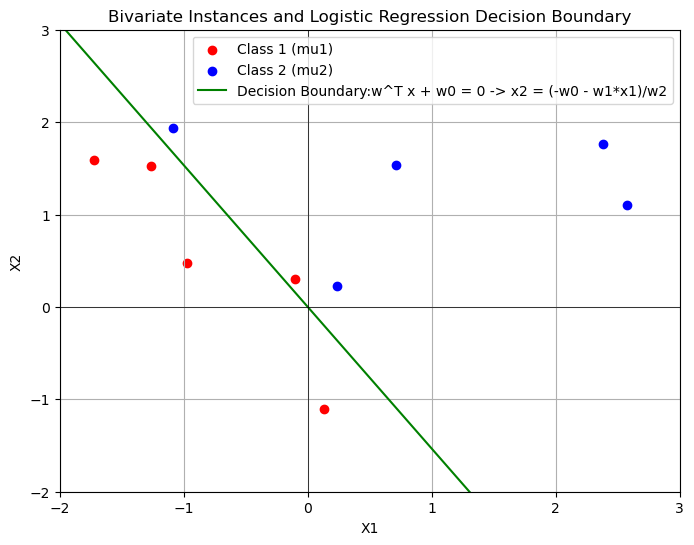

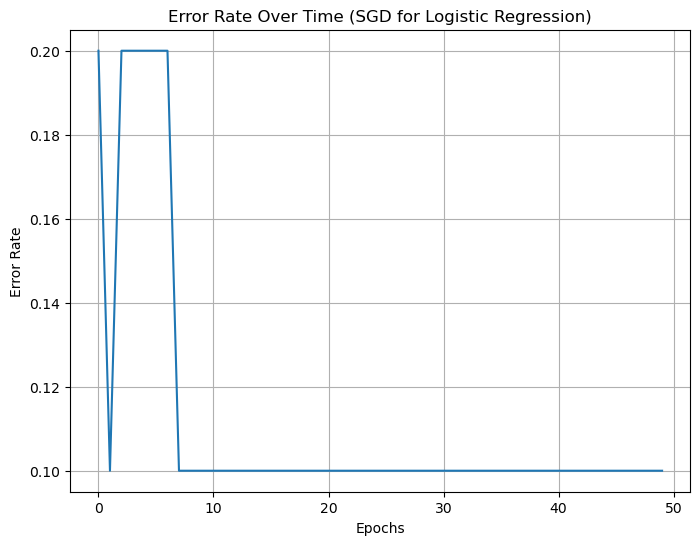

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression using Stochastic Gradient Descent (SGD)
def logistic_sgd(X, y, learning_rate, epochs):
    weights = np.random.randn(X.shape[1])  # Random initialization of weights
    errors = []  # To track the error at each epoch
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights)  # Linear combination of inputs and weights
            h = sigmoid(z)  # Predicted probability using sigmoid
            gradient = (h - y[i]) * X[i]  # Gradient calculation
            weights -= learning_rate * gradient  # Update the weights using SGD
            
        # After every epoch, compute the prediction accuracy
        y_pred = (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)  # Predict labels
        errors.append(np.mean(y_pred != y))  # Track the mean error
    return weights, errors

# Generate bivariate instances for two normal distributions
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])
sigma1 = np.eye(2)  # Identity matrix for Σ1
sigma2 = np.eye(2)  # Identity matrix for Σ2

# Generate 5 samples from each distribution
np.random.seed(30)  # For reproducibility
samples1 = np.random.multivariate_normal(mu1, sigma1, 5)
samples2 = np.random.multivariate_normal(mu2, sigma2, 5)

# Combine the data and create class labels
X = np.concatenate((samples1, samples2),axis=0)
y = np.hstack((np.zeros(5), np.ones(5)))  # Class 1 has label 0, Class 2 has label 1
# scaling the data
scaler = CustomStandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the logistic regression model using SGD
learning_rate = 0.1  # You can tune this parameter
epochs = 50

weights, errors = logistic_sgd(X, y, learning_rate, epochs)

# Calculate the accuracy of the logistic regression model
y_pred = (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)  # Predict labels using matrix multiplication
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy: {accuracy}%")

# Plot the bivariate instances and the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Class 1 (mu1)')
plt.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Class 2 (mu2)')

# Decision boundary: w^T x + w0 = 0 -> x2 = (-w0 - w1*x1)/w2
x_vals = np.linspace(-2, 3, 100)
y_vals = -(weights[0] * x_vals) / weights[1]
plt.plot(x_vals, y_vals, label=r'Decision Boundary:w^T x + w0 = 0 -> x2 = (-w0 - w1*x1)/w2', color='green')

# Plot labels and legend
plt.xlim([-2, 3])
plt.ylim([-2, 3])
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Bivariate Instances and Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()

# Plot the error over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.title('Error Rate Over Time (SGD for Logistic Regression)')
plt.grid(True)
plt.show()

# interactive 3D plot
plot_3d_data((samples1[:, 0], samples2[:, 0]), (samples1[:, 1], samples2[:, 1]),y, title='Bivariate Instances', interactive=True)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

def plot_3d_data(x_data1, y_data1, z_data1, x_data2, y_data2, z_data2, title="", interactive=False):
    """
    A function to plot 3D data interactively or statically, with two datasets.
    
    Parameters:
    - x_data1, y_data1, z_data1: Data for the first class (Class 1)
    - x_data2, y_data2, z_data2: Data for the second class (Class 2)
    - title: Title for the plot
    - interactive: If True, uses Plotly for interactive 3D plots. If False, uses Matplotlib for static plots.
    """
    if interactive:
        # Use Plotly for an interactive 3D plot
        trace1 = go.Scatter3d(
            x=x_data1, y=y_data1, z=z_data1, mode='markers',
            marker=dict(size=5, color='red'), name='Class 1'
        )
        trace2 = go.Scatter3d(
            x=x_data2, y=y_data2, z=z_data2, mode='markers',
            marker=dict(size=5, color='blue'), name='Class 2'
        )
        fig = go.Figure(data=[trace1, trace2])
        fig.update_layout(title=title, scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
                          autosize=False, width=800, height=600, margin=dict(l=0, r=0, b=0, t=40))
        fig.show()
    else:
        # Use Matplotlib for a static 3D plot
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot the first class in red
        ax.scatter(x_data1, y_data1, z_data1, color='red', s=50, alpha=0.8, label='Class 1')
        
        # Plot the second class in blue
        ax.scatter(x_data2, y_data2, z_data2, color='blue', s=50, alpha=0.8, label='Class 2')
        
        ax.set_title(title)
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        ax.legend()
        plt.show()

# Example usage (with some dummy data)
# Plot using your samples1 and samples2 data
plot_3d_data(samples1[:, 0], samples1[:, 1], y[:5], samples2[:, 0], samples2[:, 1], y[5:], title="3D Scatter Plot", interactive=True)


### Explanation of the Code

- **Parameters**:
  - `mu1 = [0, 0]` and `mu2 = [1, 1]` are the mean vectors for the two normal distributions, representing class 1 and class 2 respectively.
  - `cov1` and `cov2` are identity matrices ($\Sigma_1$ and $\Sigma_2$), which represent no correlation between the two variables for each class (bivariate normal distributions).

- **Sample Generation**: 
  - `np.random.multivariate_normal(mu1, cov1, 5)` generates 5 bivariate samples from the distribution $\mathcal{N}(\mu_1, \Sigma_1)$.
  - `np.random.multivariate_normal(mu2, cov2, 5)` generates 5 bivariate samples from the distribution $\mathcal{N}(\mu_2, \Sigma_2)$.

- **Decision Boundary**: 
  - The decision boundary is defined by the linear equation $w^T x + w_0 = 0$, where `w` is a weight vector and `w0` is a bias term.
  - The boundary separates the two classes based on the linear function of the form: $y = -\frac{w_0 + w_1 \cdot x_1}{w_2}$.
  
- **Plotting**:
  - `plt.scatter` is used to plot the samples from the two classes with distinct colors (red for class 1 and blue for class 2).
  - The decision boundary is plotted using `plt.plot`, based on the function `decision_boundary(x)`.
  - The plot includes grid lines, axes labels, and a legend to distinguish between the two classes and the decision boundary.

This code snippet visualizes the two classes and their linear separation in a 2D Cartesian plane.


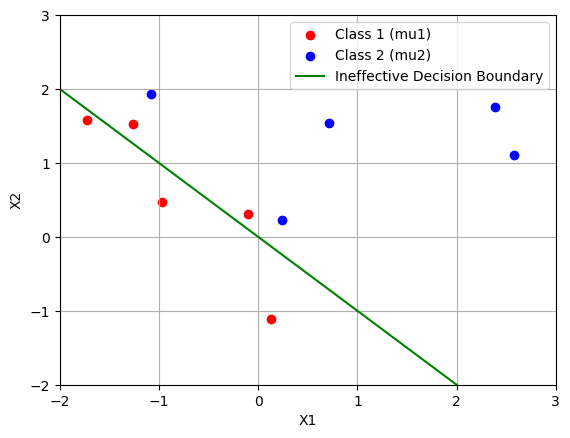

In [5]:
import numpy as np

import matplotlib.pyplot as plt

# Define the mean vectors and covariance matrices
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])
sigma1 = np.eye(2)  # Identity matrix for Σ1
sigma2 = np.eye(2)  # Identity matrix for Σ2

# Generate five samples from each distribution
np.random.seed(30)  # For reproducibility
samples1 = np.random.multivariate_normal(mu1, sigma1, 5)
samples2 = np.random.multivariate_normal(mu2, sigma2, 5)

# Plot the samples on a Cartesian plane
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Class 1 (mu1)')
plt.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Class 2 (mu2)')

# Define the ineffective decision boundary
w = np.array([1, 1])  # Weight vector
w0 = 0  # Bias term

# Calculate the decision boundary line: w^T x + w0 = 0 -> x2 = (-w0 - w1*x1)/w2
x_vals = np.linspace(-2, 3, 100)
y_vals = (-w0 - w[0] * x_vals) / w[1]

# Plot the decision boundary line
plt.plot(x_vals, y_vals, label='Ineffective Decision Boundary', color='green')

# Set the x-axis and y-axis limits
plt.xlim([-2, 3])
plt.ylim([-2, 3])

# Add grid lines, axes labels, and a legend
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Show the plot
plt.show()

The appropriate choice of the loss function for binary classification tasks in logistic regression is the binary cross-entropy loss (also known as log loss). This loss function is commonly used because it is well-suited for probabilistic classification problems and encourages the model to output high probabilities for the correct class and low probabilities for the incorrect class.

In the visualizations from (1b) and (1c), we can observe the differences and implications of using an effective decision boundary versus an ineffective decision boundary.

In (1b), an effective decision boundary is used, which separates the two classes accurately. The instances sampled from the $\mathcal{N}(\mu_1, \Sigma_1)$ distribution, representing class 1, have a sigmoid output close to 0, indicating a high probability of belonging to class 1. Conversely, the instances from the $\mathcal{N}(\mu_2, \Sigma_2)$ distribution, representing class 2, have a sigmoid output close to 1, indicating a high probability of belonging to class 2. The decision boundary in the Cartesian plane corresponds to the midpoint of 0.5 on the z-axis, which effectively differentiates between the two classes.

In contrast, in (1c), an ineffective decision boundary is used, which leads to misclassification of instances from both classes. The decision boundary fails to accurately separate the two classes, resulting in instances from both distributions having sigmoid outputs close to 0.5. This ineffective decision boundary leads to an estimated accuracy of around 50%, indicating that the model is unable to distinguish between the two classes effectively.

The choice of the loss function, binary cross-entropy loss, plays a crucial role in training the logistic regression model. By minimizing this loss function, the model learns to adjust the weights and biases to maximize the likelihood of the correct class and minimize the likelihood of the incorrect class. In the case of an effective decision boundary, the model is able to achieve a high accuracy by correctly classifying the instances. However, in the case of an ineffective decision boundary, the model fails to minimize the loss and results in a low accuracy.

Overall, the appropriate choice of the binary cross-entropy loss function in logistic regression allows the model to learn the optimal decision boundary and make accurate predictions, leading to better classification performance.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sigmoid function (not explicitly needed for this example, but useful in logistic regression)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# (1a) Generate bivariate instances from two normal distributions
mu1 = np.array([0, 0])  # Mean of the first class
mu2 = np.array([1, 1])  # Mean of the second class
sigma1 = np.eye(2)  # Identity covariance matrix for class 1
sigma2 = np.eye(2)  # Identity covariance matrix for class 2

# Generate 5 samples from each distribution
np.random.seed(30)  # Seed for reproducibility
samples1 = np.random.multivariate_normal(mu1, sigma1, 5)  # Class 1 samples
samples2 = np.random.multivariate_normal(mu2, sigma2, 5)  # Class 2 samples

# Combine the data
X = np.concatenate((samples1, samples2), axis=0)
y = np.concatenate((np.zeros(5), np.ones(5)))  # Class labels (0 for class 1, 1 for class 2)

# Train logistic regression model using scikit-learn
logreg = LogisticRegression()
logreg.fit(X, y)

# Get the learned weights and intercept
weights = logreg.coef_[0]  # Coefficients (weights)
intercept = logreg.intercept_[0]  # Intercept (bias)

# Function to calculate the decision boundary line
def decision_boundary(x1, weights, intercept):
    w1, w2 = weights  # Extract weights for x1 and x2
    return -(w1 / w2) * x1 - (intercept / w2)  # Rearrange to get x2 in terms of x1

# Generate x1 values for plotting, make sure it covers the entire x-axis range of the data
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = decision_boundary(x1_range, weights, intercept)

# Plot the samples in 2D
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Class 1 (μ1)')
plt.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Class 2 (μ2)')

# Plot the learned decision boundary
plt.plot(x1_range, x2_range, color='green', label='Learned Decision Boundary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Bivariate Instances of Class 1 and Class 2 with Decision Boundargy')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'sklearn'

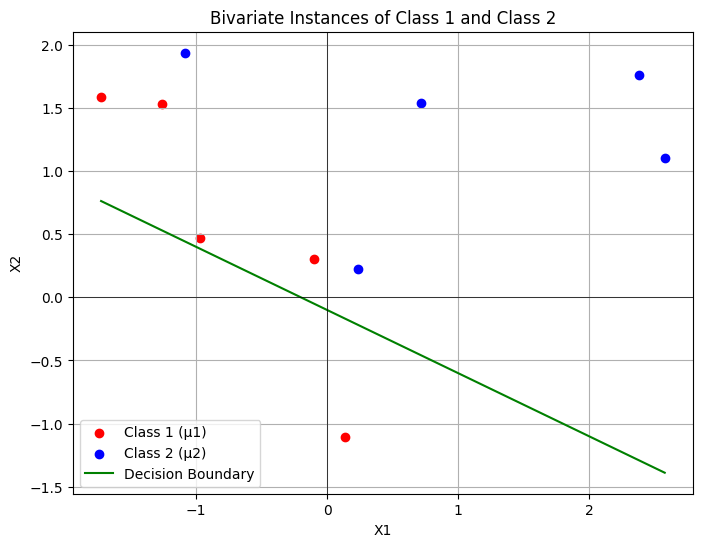

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting


# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# (1a) Generate bivariate instances from two normal distributions
mu1 = np.array([0, 0])  # Mean of the first class
mu2 = np.array([1, 1])  # Mean of the second class
sigma1 = np.eye(2)  # Identity covariance matrix for class 1
sigma2 = np.eye(2)  # Identity covariance matrix for class 2

# Generate 5 samples from each distribution
np.random.seed(30)  # Seed for reproducibility
samples1 = np.random.multivariate_normal(mu1, sigma1, 5)  # Class 1 samples
samples2 = np.random.multivariate_normal(mu2, sigma2, 5)  # Class 2 samples


# Assign arbitrary weights
weights = np.array([1, 2])
intercept = 0.2

# Combine the data
X = np.concatenate((samples1, samples2), axis=0)
y = np.concatenate((np.zeros(5), np.ones(5)))  # Class labels (0 for class 1, 1 for class 2)
# Plot the data and linear decision boundary
def decision_boundary(x1, weights, intercept):
    w1, w2 = weights[0], weights[1]  # Extract weights for liveness (x1) and loudness (x2)
    return -(w1 / w2) * x1 - (intercept / w2)  # Rearrange to get x2 in terms of x1

# Generate x1 values for plotting, make sure it covers the entire x-axis
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = decision_boundary(x1_range, weights, intercept)


# Plot the samples in 2D
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Class 1 (μ1)')
plt.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Class 2 (μ2)')

# Plot the decision boundary
plt.plot(x1_range, x2_range, color='green', label='Decision Boundary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Bivariate Instances of Class 1 and Class 2')
plt.legend()
plt.grid(True)

plt.show()





ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

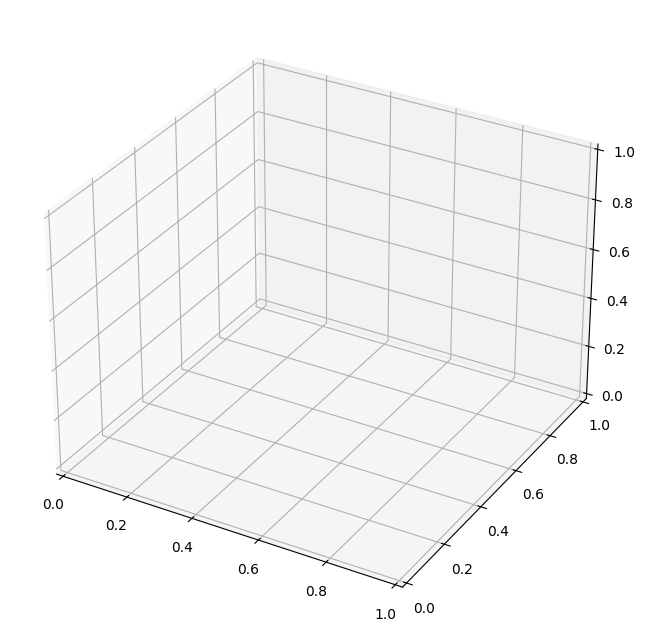

In [52]:
# (1b) Add a third axis (z) for the sigmoid function output
# Train a simple logistic regression using SGD to find the decision boundary
def logistic_sgd(X, y, learning_rate, epochs):
    weights = np.random.randn(X.shape[1])
    errors = []
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = X[i] @ weights
            h = sigmoid(z)
            gradient = (h - y[i]) * X[i]
            weights -= learning_rate * gradient
        y_pred = (sigmoid(X @ weights) >= 0.5).astype(int)
        errors.append(np.mean(y_pred != y))
    return weights, errors

def logistic_sgd(X, y, learning_rate, epochs):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term (X0 = 1)
    weights = np.random.randn(X_with_bias.shape[1])  # Initialize random weights
    for epoch in range(epochs):
        for i in range(X_with_bias.shape[0]):
            z = np.dot(X_with_bias[i], weights)
            h = sigmoid(z)  # Sigmoid output
            gradient = (h - y[i]) * X_with_bias[i]  # Gradient calculation
            weights -= learning_rate * gradient  # Update weights
    return weights

# Train the logistic regression model
learning_rate = 0.1
epochs = 100
weights = logistic_sgd(X, y, learning_rate, epochs)

# Plot the 3D space, with the third axis being the sigmoid output
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Calculate sigmoid outputs for plotting
z1 = sigmoid(np.dot(np.c_[np.ones(samples1.shape[0]), samples1], weights))
z2 = sigmoid(np.dot(np.c_[np.ones(samples2.shape[0]), samples2], weights))

# Plot the samples in 3D
ax.scatter(samples1[:, 0], samples1[:, 1], z1, color='red', label='Class 1 (μ1)')
ax.scatter(samples2[:, 0], samples2[:, 1], z2, color='blue', label='Class 2 (μ2)')

# Plot the decision boundary (when sigmoid output is 0.5)
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = sigmoid(weights[0] + weights[1] * X_grid + weights[2] * Y_grid)
ax.plot_surface(X_grid, Y_grid, Z_grid, color='green', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Sigmoid Output')
ax.set_title('3D Plot: Sigmoid Output and Logistic Decision Boundary')
plt.legend()
plt.show()


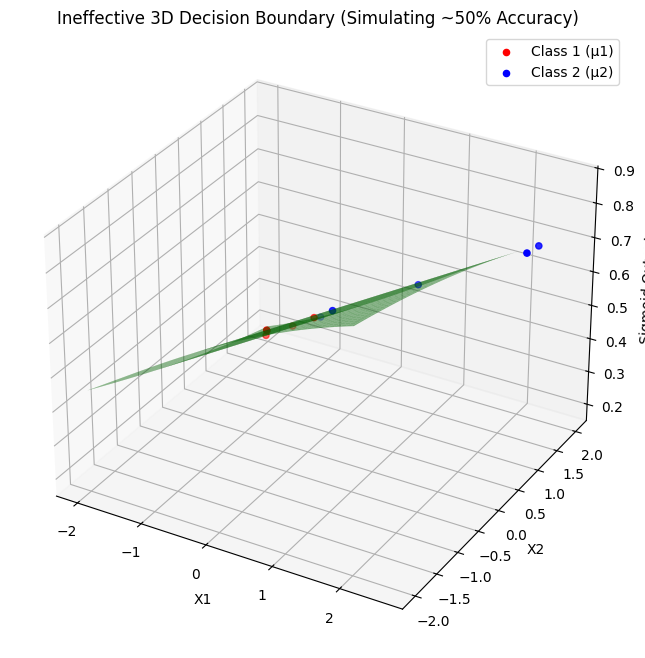

In [47]:
# (1c) Replicate with an ineffective boundary (simulate low accuracy)
# Here, we use an ineffective decision boundary (poorly trained model)
# Set random initial weights and skip training for ineffective boundary
ineffective_weights = np.array([0.2, 0.5, -0.3])  # Random ineffective weights

# Plot the ineffective decision boundary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Calculate sigmoid outputs for plotting (ineffective)
z1_ineff = sigmoid(np.dot(np.c_[np.ones(samples1.shape[0]), samples1], ineffective_weights))
z2_ineff = sigmoid(np.dot(np.c_[np.ones(samples2.shape[0]), samples2], ineffective_weights))

# Plot the samples in 3D with ineffective boundary
ax.scatter(samples1[:, 0], samples1[:, 1], z1_ineff, color='red', label='Class 1 (μ1)')
ax.scatter(samples2[:, 0], samples2[:, 1], z2_ineff, color='blue', label='Class 2 (μ2)')

# Ineffective decision boundary (random surface)
Z_grid_ineff = sigmoid(ineffective_weights[0] + ineffective_weights[1] * X_grid + ineffective_weights[2] * Y_grid)
ax.plot_surface(X_grid, Y_grid, Z_grid_ineff, color='green', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Sigmoid Output')
ax.set_title('Ineffective 3D Decision Boundary (Simulating ~50% Accuracy)')
plt.legend()
plt.show()

In [ ]:


# (1d) Discuss loss function choice (binary cross-entropy for logistic regression)
# Binary Cross-Entropy Loss Function (optional to visualize):
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# Predicted probabilities
y_pred_eff = sigmoid(np.dot(np.c_[np.ones(X.shape[0]), X], weights))
y_pred_ineff = sigmoid(np.dot(np.c_[np.ones(X.shape[0]), X], ineffective_weights))

# Compute the loss for both models
effective_loss = binary_cross_entropy_loss(y, y_pred_eff)
ineffective_loss = binary_cross_entropy_loss(y, y_pred_ineff)

print(f"Effective Model Loss: {effective_loss}")
print(f"Ineffective Model Loss: {ineffective_loss}")

# (1e) Discuss relation between logistic regression and neuron model (commentary):
# Logistic regression is closely related to the basic artificial neuron model.
# In both cases, you have:
# - Input features (X1, X2, etc.), weighted by weights (w1, w2, etc.)
# - A linear combination of weighted inputs
# - An activation function, such as the sigmoid, to map the output to a range (0, 1).
# - Logistic regression uses the sigmoid function for binary classification,
#   much like how a single neuron might use the sigmoid function to determine output.
